In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
url = "C:/Users/Jumana Baharul/Downloads/Heart Disease Dataset/heart.csv"
data = pd.read_csv(url)

In [5]:
# Handle missing values (in this case we don't have missing values, but let's apply the technique)
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'most_frequent' depending on the dataset
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Feature scaling
scaler = StandardScaler()

# Separate features and target
X = data.drop("target", axis=1)
y = data["target"]

# Scale the features
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models to compare
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)
}

# Hyperparameter grid for tuning
param_grid = {
    "Random Forest": {
        "n_estimators": [100, 200],
        "max_depth": [3, 5, 10],
        "min_samples_split": [2, 5],
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"]
    },
    "Logistic Regression": {
        "C": [0.1, 1, 10]
    }
}

In [7]:
best_models = {}
for model_name, model in models.items():
    grid = GridSearchCV(model, param_grid[model_name], cv=5, scoring="accuracy")
    grid.fit(X_train, y_train)
    best_models[model_name] = grid.best_estimator_
    print(f"Best {model_name}: {grid.best_params_}")

Best Logistic Regression: {'C': 1}
Best Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best SVM: {'C': 10, 'kernel': 'rbf'}


In [8]:
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"Confusion Matrix for {model_name}:\n", confusion_matrix(y_test, y_pred))
    print(f"Classification Report for {model_name}:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.7951
Confusion Matrix for Logistic Regression:
 [[73 29]
 [13 90]]
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.85      0.72      0.78       102
         1.0       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

Random Forest Accuracy: 0.9854
Confusion Matrix for Random Forest:
 [[102   0]
 [  3 100]]
Classification Report for Random Forest:
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       102
         1.0       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

SVM Accuracy: 0.9756
Confusion Matrix for SVM:
 [[100   2]
 [  3 1

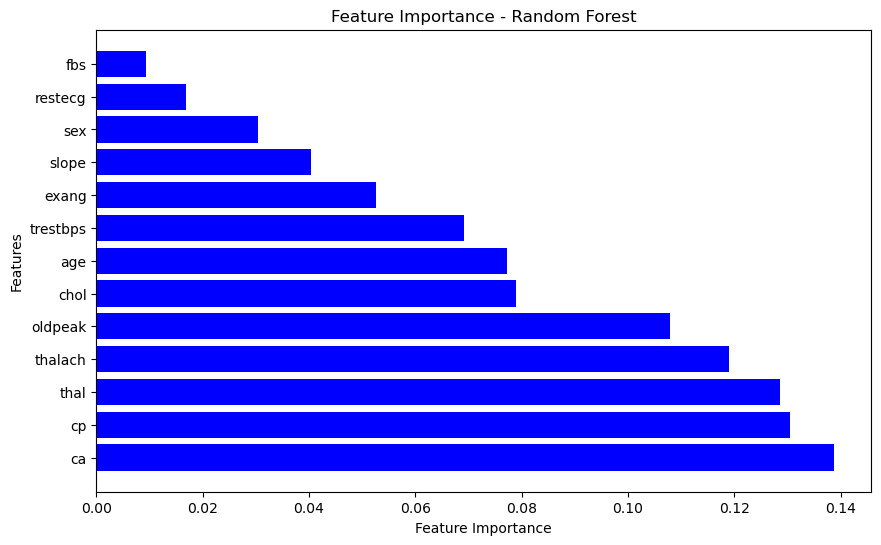

In [9]:
if "Random Forest" in best_models:
    feature_importances = best_models["Random Forest"].feature_importances_
    sorted_idx = np.argsort(feature_importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx], color='b')
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.title("Feature Importance - Random Forest")
    plt.show()

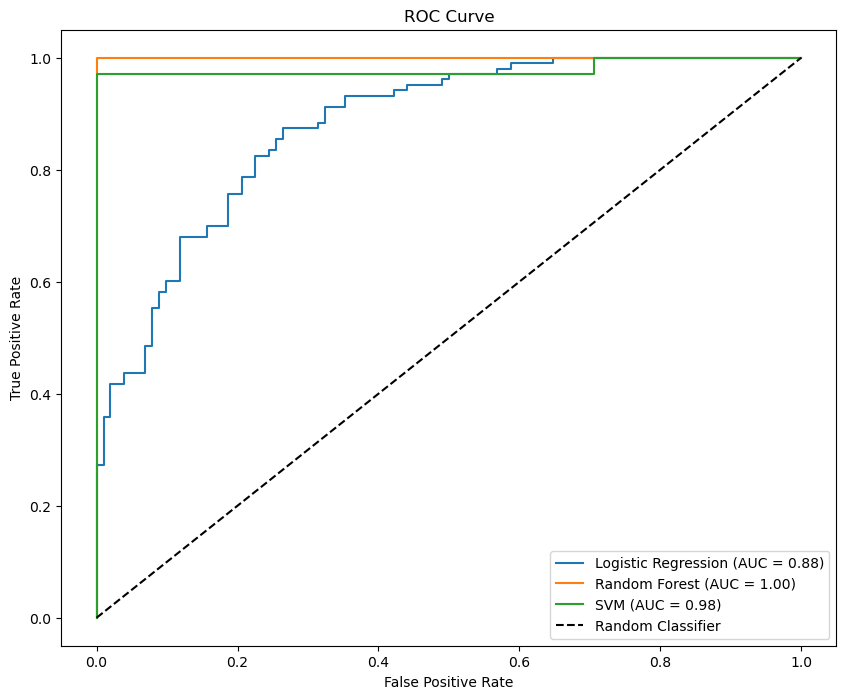

In [10]:
plt.figure(figsize=(10, 8))
for model_name, model in best_models.items():
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc_score = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()